In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data =pd.read_csv('crypto_prices_FINALIZED.csv')
data

,Name,Rank,Price,24h Change,"""Market Cap""",Volume,Circ_Supply,Category
0,BTC,1,"88,066.64 USD",−1.68%,1.75 T USD,45.67 B USD,19.83 M,"Cryptocurrencies, Layer 1"
1,ETH,2,"2,191.22 USD",−0.93%,264.25 B USD,18.7 B USD,120.59 M,"Smart contract platforms, Layer 1"
2,XRP,3,2.5575 USD,+2.22%,148.21 B USD,6.58 B USD,57.95 B,"Cryptocurrencies, Enterprise solutions, Layer ..."
3,USDT,4,0.99989 USD,−0.00%,142.7 B USD,85.18 B USD,142.72 B,"Stablecoins, Asset-backed Stablecoins"
4,BNB,5,591.90 USD,−0.53%,84.33 B USD,1.58 B USD,142.48 M,"Smart contract platforms, Centralized-exchange..."
...,...,...,...,...,...,...,...,...
4052,KPAD,—,0.00080838 USD,−4.91%,—,2.07 K USD,—,—
4053,NAV,—,0.035119 USD,+3.07%,—,57.97 K USD,—,Cryptocurrencies
4054,PLACE,—,0.000061490 USD,+10.92%,—,—,—,"Gaming, NFTs & Collectibles, Metaverse"
4055,DEK,—,0.00065199 USD,−10.96%,—,174 USD,—,—


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          4057 non-null   object
 1   Rank          4057 non-null   object
 2   Price         4057 non-null   object
 3   24h Change    4057 non-null   object
 4   "Market Cap"  4057 non-null   object
 5   Volume        4057 non-null   object
 6   Circ_Supply   4057 non-null   object
 7   Category      4057 non-null   object
dtypes: object(8)
memory usage: 253.7+ KB


In [9]:
cols_to_fix = ["Rank", "Price", "24h Change", "Market Cap", "Volume", "Circ_Supply"]
for col in cols_to_fix:
    data[col] = data[col].astype(str).str.replace(r'[^\d.-]', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4057 non-null   object 
 1   Rank         3799 non-null   float64
 2   Price        3528 non-null   float64
 3   24h Change   4054 non-null   float64
 4   Market Cap   3799 non-null   float64
 5   Volume       3959 non-null   float64
 6   Circ_Supply  3799 non-null   float64
 7   Category     4057 non-null   object 
dtypes: float64(6), object(2)
memory usage: 253.7+ KB
None
   Name  Rank        Price  24h Change  Market Cap  Volume  Circ_Supply  \
0   BTC   1.0  88066.64000        1.68        1.75   45.67        19.83   
1   ETH   2.0   2191.22000        0.93      264.25   18.70       120.59   
2   XRP   3.0      2.55750        2.22      148.21    6.58        57.95   
3  USDT   4.0      0.99989        0.00      142.70   85.18       142.72   
4   BNB   5.0    591.90000        0.53  

In [7]:
print(data.columns)

Index(['Name', 'Rank', 'Price', '24h Change', '"Market Cap"', 'Volume',
       'Circ_Supply', 'Category'],
      dtype='object')


In [8]:
data.rename(columns={'"Market Cap"': 'Market Cap'}, inplace=True)

In [4]:
data.describe()

,Name,Rank,Price,24h Change,"""Market Cap""",Volume,Circ_Supply,Category
count,4057,4057,4057,4057,4057,4057,4057,4057
unique,3781,3800,3728,1847,3131,3320,2938,674
top,ANDY,—,0.00000000000000 USD,0.00%,—,—,—,—
freq,5,258,26,94,258,98,258,1661


In [10]:
data.isna().sum()

,0
Name,0
Rank,258
Price,529
24h Change,3
Market Cap,258
Volume,98
Circ_Supply,258
Category,0


In [11]:
data.describe()

,Rank,Price,24h Change,Market Cap,Volume,Circ_Supply
count,3799.000000,3.528000e+03,4054.000000,3799.000000,3959.000000,3.799000e+03
mean,1918.921295,5.359572e+02,5.150705,145.012885,149.518080,3.416521e+03
std,1115.989785,1.866388e+04,9.150405,227.436620,219.015886,7.340246e+04
min,1.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000e+00
25%,951.500000,1.459075e-03,1.000000,5.130000,7.905000,8.895000e+00
50%,1912.000000,1.132300e-02,2.825000,32.250000,53.560000,7.525000e+01
75%,2878.500000,1.161300e-01,6.090000,178.000000,187.710000,3.400000e+02
max,3881.000000,1.080303e+06,213.340000,999.330000,999.250000,4.200000e+06


In [12]:
data['Rank'].fillna(method='ffill', inplace=True)
data['Circ_Supply'].fillna(method='ffill', inplace=True)

<ipython-input-12-f12e1ea2f189>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rank'].fillna(method='ffill', inplace=True)
<ipython-input-12-f12e1ea2f189>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Rank'].fillna(method='ffill', inplace=True)
<ipython-input-12-f12e1ea2f189>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wil

In [13]:
data['Price'].fillna(data['Price'].median(), inplace=True)
data['Market Cap'].fillna(data['Market Cap'].median(), inplace=True)
data['Volume'].fillna(data['Volume'].median(), inplace=True)

<ipython-input-13-1f9f30645526>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(data['Price'].median(), inplace=True)
<ipython-input-13-1f9f30645526>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [14]:
data['24h Change'].fillna(data['24h Change'].mean(), inplace=True)
print(data.isna().sum())

Name           0
Rank           0
Price          0
24h Change     0
Market Cap     0
Volume         0
Circ_Supply    0
Category       0
dtype: int64


<ipython-input-14-ad7a88d9b410>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['24h Change'].fillna(data['24h Change'].mean(), inplace=True)


In [15]:
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


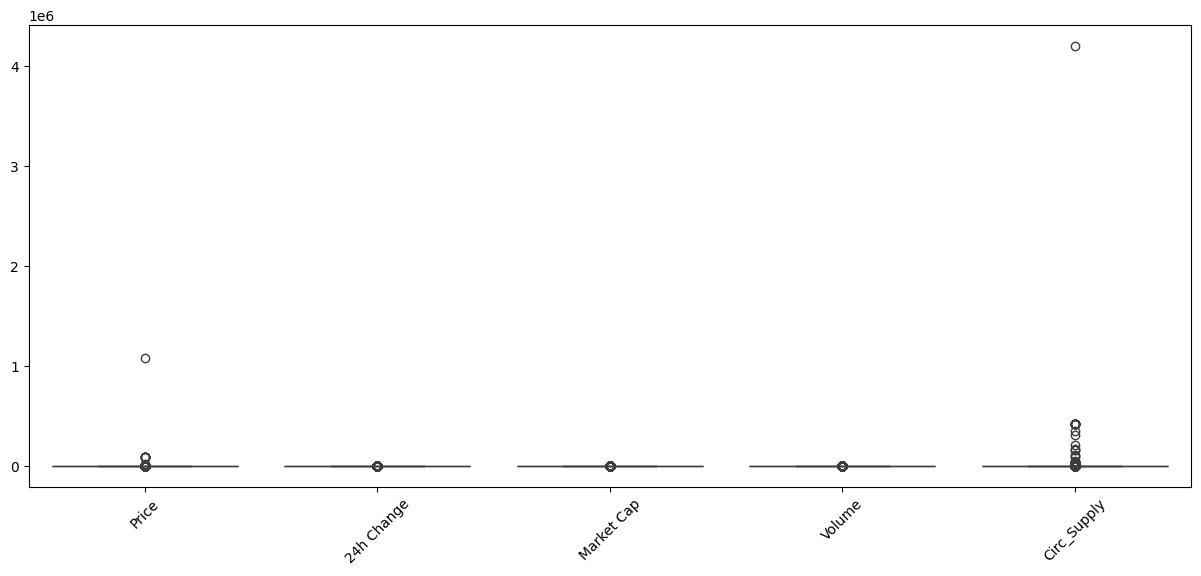

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["Price", "24h Change", "Market Cap", "Volume", "Circ_Supply"]
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.show()

In [17]:
data.describe()

,Rank,Price,24h Change,Market Cap,Volume,Circ_Supply
count,4057.000000,4.057000e+03,4057.000000,4057.000000,4057.000000,4.057000e+03
mean,2043.697313,4.660742e+02,5.150705,137.841866,147.200138,3.199315e+03
std,1181.321164,1.740520e+04,9.147021,221.798220,216.854963,7.103445e+04
min,1.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000e+00
25%,1016.000000,2.067000e-03,1.000000,5.710000,8.250000,5.310000e+00
50%,2041.000000,1.132300e-02,2.830000,32.250000,53.560000,6.007000e+01
75%,3076.000000,7.529800e-02,6.090000,157.810000,180.520000,2.969800e+02
max,3881.000000,1.080303e+06,213.340000,999.330000,999.250000,4.200000e+06


In [18]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in ["Price", "Market Cap", "Volume", "Circ_Supply"]:
    print(f"Outliers in {col}: {len(detect_outliers(data, col))}")

Outliers in Price: 738
Outliers in Market Cap: 524
Outliers in Volume: 459
Outliers in Circ_Supply: 433


In [19]:
for col in ["Price", "Market Cap", "Volume", "Circ_Supply"]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] > upper_bound, upper_bound,
                         np.where(data[col] < lower_bound, lower_bound, data[col]))

In [20]:
for col in ["Price", "Market Cap", "Volume", "Circ_Supply"]:
    print(f"Outliers in {col}: {len(detect_outliers(data, col))}")

Outliers in Price: 0
Outliers in Market Cap: 0
Outliers in Volume: 0
Outliers in Circ_Supply: 0


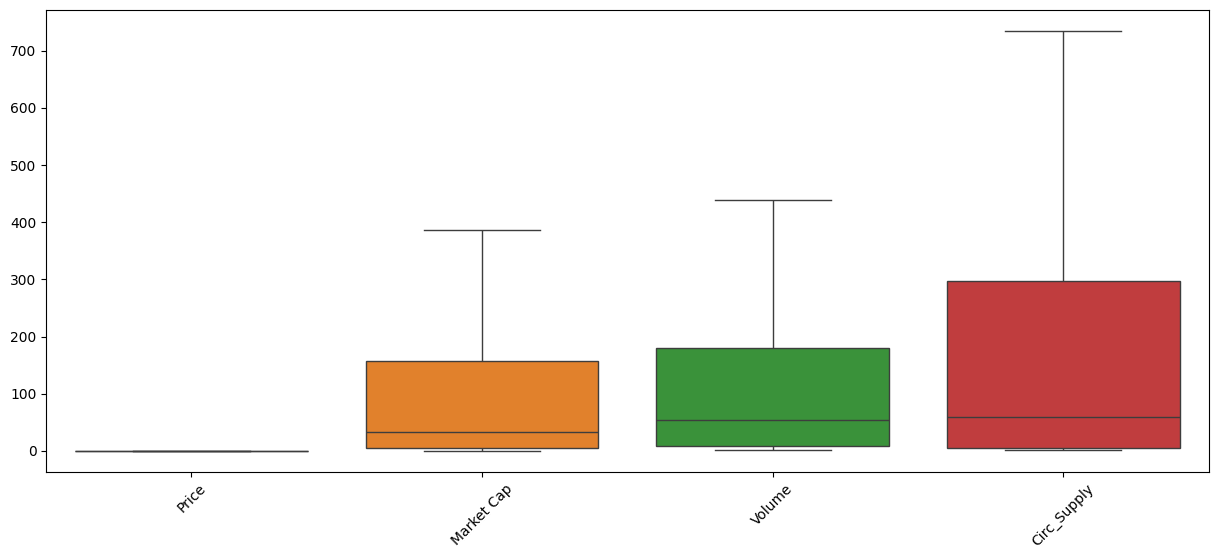

In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[["Price", "Market Cap", "Volume", "Circ_Supply"]])
plt.xticks(rotation=45)
plt.show()

In [23]:
data[["Price", "Market Cap", "Volume", "Circ_Supply"]].describe()

,Price,Market Cap,Volume,Circ_Supply
count,4057.000000,4057.000000,4057.000000,4057.000000
mean,0.050793,104.154730,120.937263,189.707191
std,0.070976,136.050667,148.832958,251.930602
min,0.000000,0.000000,1.000000,1.000000
25%,0.002067,5.710000,8.250000,5.310000
50%,0.011323,32.250000,53.560000,60.070000
75%,0.075298,157.810000,180.520000,296.980000
max,0.185145,385.960000,438.925000,734.485000


In [24]:
data.dtypes

,0
Name,object
Rank,float64
Price,float64
24h Change,float64
Market Cap,float64
Volume,float64
Circ_Supply,float64
Category,object


In [26]:
data["Name"].value_counts()
#same name diff price?

,count
Name,
ANDY,5
DOGE,5
X,5
PEPE,5
BROCCOLI,5
...,...
DCK,1
FEG,1
CLEAR,1


In [30]:
for col in data.columns:
    if data[col].dtype == "object":
        print(f"Unique values in {col}:", data[col].unique()[:10])


Unique values in Name: ['BTC' 'ETH' 'XRP' 'USDT' 'BNB' 'SOL' 'USDC' 'ADA' 'DOGE' 'TRX']
Unique values in Category: ['Cryptocurrencies, Layer 1' 'Smart contract platforms, Layer 1'
 'Cryptocurrencies, Enterprise solutions, Layer 1, Made in America'
 'Stablecoins, Asset-backed Stablecoins'
 'Smart contract platforms, Centralized-exchange, Layer 1'
 'Smart contract platforms, Layer 1, Made in America'
 'Stablecoins, Asset-backed Stablecoins, Made in America'
 'Memes, Cryptocurrencies, Layer 1, Made in America'
 'Smart contract platforms, Payments, Layer 1' '—']


In [31]:
numeric_data = data.select_dtypes(include=["number"])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                 Rank     Price  24h Change  Market Cap    Volume  Circ_Supply
Rank         1.000000 -0.527280    0.081369    0.114026  0.031558    -0.150610
Price       -0.527280  1.000000   -0.091291   -0.061152 -0.056489    -0.076785
24h Change   0.081369 -0.091291    1.000000   -0.019168 -0.034377     0.010108
Market Cap   0.114026 -0.061152   -0.019168    1.000000 -0.070045     0.003246
Volume       0.031558 -0.056489   -0.034377   -0.070045  1.000000     0.013752
Circ_Supply -0.150610 -0.076785    0.010108    0.003246  0.013752     1.000000


In [32]:
(data == 0).sum()

,0
Name,0
Rank,0
Price,60
24h Change,104
Market Cap,1
Volume,0
Circ_Supply,0
Category,0


In [33]:
print(data[data["Price"] == 0])
print(data[data["Market Cap"] == 0])
print(data[data["24h Change"] == 0])

           Name    Rank  Price  24h Change  Market Cap   Volume  Circ_Supply  \
184    BABYDOGE   185.0    0.0        2.31      207.67   20.820      734.485   
971       KISHU   973.0    0.0        1.89       19.09  383.130      734.485   
1014     AIDOGE  1016.0    0.0        1.19       16.88    4.150      734.485   
1059      QUACK  1061.0    0.0       34.11       15.35  438.925      734.485   
1234        PIT  1238.0    0.0        0.48        9.58   98.830      734.485   
1352        ASS  1360.0    0.0        0.98        7.48    1.260      734.485   
1529   MCONTENT  1539.0    0.0        9.78        4.77  284.700      734.485   
1661        CAT  1673.0    0.0        3.09        3.90  438.925      734.485   
1944       MONG  1957.0    0.0       27.57        2.20    1.300      581.200   
2051   DOGECOIN  2064.0    0.0        5.13        1.84    1.250      734.485   
2101       GBEX  2114.0    0.0        5.98        1.66   37.320      353.480   
2170      FROGE  2185.0    0.0        2.

In [35]:
data = data[data['Price'] != 0]

In [ ]:
data.to_csv("cleaned_crypto_data.csv", index=False)